## Data Preprocessing
Additional work before we send the csv to the classifiers.


In [30]:
!pwd
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize, WordNetLemmatizer, bigrams, trigrams
from nltk import stem, pos_tag
from nltk.corpus import wordnet as wn
import wordcloud
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from PIL import Image
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

/Users/Jill/Documents/New Media and Sentiment Analysis/CA/EB5204_Sentiment_Mining_CA


In [31]:
df = pd.read_csv('./data/df_reviews_train.csv')
df.head()

,rating,review,sentiment
0,5,In my younger days when lunch choices consiste...,1
1,3,"After going through yelp and tripadvisor, I wa...",-1
2,5,Ordered Sichuan Prawns and Singapore Rice Nood...,1
3,3,Wong Kei is one of the many options you'll fin...,-1
4,1,One of the worst experience in a restaurant in...,-1


In [32]:
stop = stopwords.words('english')
snowball = stem.snowball.EnglishStemmer()
wnl = WordNetLemmatizer()

Distribution of the Classes in the subsample dataset
 1    0.5
-1    0.5
Name: sentiment, dtype: float64


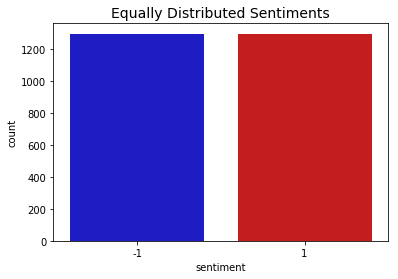

In [33]:
# Random Sampling
neg_df = df.loc[df['sentiment'] == -1]
pos_df = df.loc[df['sentiment'] == 1][:len(neg_df)]
sampled_df = pd.concat([neg_df, pos_df])
sampled_df = sampled_df.sample(frac=1, random_state=42)
print('Distribution of the Classes in the subsample dataset')
print(sampled_df['sentiment'].value_counts()/len(sampled_df))
colors = ["#0101DF", "#DF0101"]
sns.countplot('sentiment', data=sampled_df, palette=colors)
plt.title('Equally Distributed Sentiments', fontsize=14)
plt.show()

sampled_df.to_csv('/Users/Jill/Documents/New Media and Sentiment Analysis/CA/EB5204_Sentiment_Mining_CA/data/df_downsampled.csv')

In [34]:
reviews = sampled_df['review']
ratings = sampled_df['rating']
sentiments = sampled_df['sentiment']

In [35]:
# Remove all the punctuations and numbers
def removePunc(reviews):
    comwoPunc = str.maketrans({key: None for key in string.punctuation
                               + string.digits})
    for i in reviews.keys():
        comment = reviews.loc[i]
        reviewswoPunc = reviews.replace(comment, comment.translate(comwoPunc))
    return reviewswoPunc

In [36]:
# Convert all characters to Lower case
def convToLow(words):
    reviewsToLow = words.apply(str.lower)
    return reviewsToLow

In [37]:
# Stopwords removal
def removeStop(text, stop):
    for i in text.keys():
        comment = text.loc[i]
        comment_nostop = " ".join(filter(lambda word: word not in stop,
                                     comment.split()))
        reviewswoStop = text.replace(comment, comment_nostop)
    return reviewswoStop

In [38]:
# Tokenization
def token(text):
    reviewsToken = text.apply(word_tokenize)
    return reviewsToken

In [39]:
# pos tagging
def posTag(words):
    reviews_pos = words.apply(pos_tag)
    reviews_wnpos = []
    for i in reviews_pos.keys():
        comment = reviews_pos.loc[i]
        comment_wnpos = []
        for t in comment:
            t = list(t)
            tag = t[1]
            if t[1].startswith('J'):
                t[1] = wn.ADJ
            elif t[1].startswith('V'):
                t[1] = wn.VERB
            elif t[1].startswith('N'):
                t[1] = wn.NOUN
            elif t[1].startswith('R'):
                t[1] = wn.ADV
            else:
                del t
                t = None
            if t is not None:
                comment_wnpos.append(t)
            else:
                pass
        reviews_wnpos.append(comment_wnpos)
    reviews_wnpos = pd.Series(reviews_wnpos, index=reviews_pos.keys())
    return reviews_wnpos

In [40]:
# Lemmatization
def lemma(text, wnl):
    reviews_lem = []
    for i in text.keys():
        comment = text.loc[i]
        comment_lem = []
        for t in comment:
            word = t[0]
            tag = t[1]
            t = wnl.lemmatize(word, pos=tag)
            comment_lem.append(t)
        reviews_lem.append(comment_lem)
    allReviews = []
    for j in reviews_lem:
        reviews = ' '.join(j)
        allReviews.append(reviews)
    reviewsLemma = pd.Series(allReviews, index=reviews_wnpos.keys())
    return reviewsLemma

In [42]:
if __name__  == 'main':
    reviews = removePunc(reviews)
    reviews = convToLow(reviews)
    reviews = removeStop(reviews)
    reviews = token(reviews)
    reviews = posTag(reviews)
    final_reviews = lemma(reviews)
    final_reviews.to_csv('/Users/Jill/Documents/New Media and Sentiment Analysis/CA/EB5204_Sentiment_Mining_CA/data/df_preprocessing.csv', encoding='utf-8')